<a href="https://colab.research.google.com/github/aggrigorenko/sf_data_science/blob/main/EDA_Project_3_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка данных

In [ ]:
hotels = pd.read_csv('/content/drive/MyDrive/data3/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


# Очистка данных

In [ ]:
# поиск дубликатов
mask = hotels.duplicated()
hotel_duplicates = hotels[mask]
print(f'Число найденных дубликатов: {hotel_duplicates.shape[0]}')
# удаление дубликатов
hotels = hotels.drop_duplicates();

Число найденных дубликатов: 307


In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386496 non-null  object 
 1   additional_number_of_scoring                386496 non-null  int64  
 2   review_date                                 386496 non-null  object 
 3   average_score                               386496 non-null  float64
 4   hotel_name                                  386496 non-null  object 
 5   reviewer_nationality                        386496 non-null  object 
 6   negative_review                             386496 non-null  object 
 7   review_total_negative_word_counts           386496 non-null  int64  
 8   total_number_of_reviews                     386496 non-null  int64  
 9   positive_review                             386496 non-null  object 
 

In [ ]:
# список отелей без координат

hotels_nulls = hotels[hotels['lat'].isnull() == True]
display(hotels_nulls['hotel_name'].value_counts())

Fleming s Selection Hotel Wien City                 496
Hotel City Central                                  421
Hotel Atlanta                                       285
Maison Albar Hotel Paris Op ra Diamond              224
Hotel Daniel Vienna                                 182
Hotel Pension Baron am Schottentor                  172
Austria Trend Hotel Schloss Wilhelminenberg Wien    141
NH Collection Barcelona Podium                      113
Derag Livinghotel Kaiser Franz Joseph Vienna        112
City Hotel Deutschmeister                            63
Holiday Inn Paris Montmartre                         47
Hotel Park Villa                                     44
Cordial Theaterhotel Wien                            40
Roomz Vienna                                         34
Mercure Paris Gare Montparnasse                      28
Hotel Advance                                        26
Renaissance Barcelona Hotel                          20
Name: hotel_name, dtype: int64

In [ ]:
# заполнение координат отелей с сайта https://www.mapsdirections.info/ru/GPS-координаты-Google-Картах.html

hotels.loc[(hotels.hotel_name == 'Fleming s Selection Hotel Wien City'), 'lat'] = 50.11753335
hotels.loc[(hotels.hotel_name == 'Fleming s Selection Hotel Wien City'), 'lng'] = 8.680225139617644

hotels.loc[(hotels.hotel_name == 'Hotel City Central'), 'lat'] = 48.2135658
hotels.loc[(hotels.hotel_name == 'Hotel City Central'), 'lng'] = 16.3799212

hotels.loc[(hotels.hotel_name == 'Hotel Atlanta'), 'lat'] = 50.8520697
hotels.loc[(hotels.hotel_name == 'Hotel Atlanta'), 'lng'] = 4.354408380443903

hotels.loc[(hotels.hotel_name == 'Maison Albar Hotel Paris Op ra Diamond'), 'lat'] = 48.8753905
hotels.loc[(hotels.hotel_name == 'Maison Albar Hotel Paris Op ra Diamond'), 'lng'] = 2.2944392

hotels.loc[(hotels.hotel_name == 'Hotel Daniel Vienna'), 'lat'] = 48.9203499
hotels.loc[(hotels.hotel_name == 'Hotel Daniel Vienna'), 'lng'] = -1.3067791

hotels.loc[(hotels.hotel_name == 'Hotel Pension Baron am Schottentor'), 'lat'] = 48.5193167
hotels.loc[(hotels.hotel_name == 'Hotel Pension Baron am Schottentor'), 'lng'] = 0.4726403

hotels.loc[(hotels.hotel_name == 'Austria Trend Hotel Schloss Wilhelminenberg Wien'), 'lat'] = 48.18479885
hotels.loc[(hotels.hotel_name == 'Austria Trend Hotel Schloss Wilhelminenberg Wien'), 'lng'] = 16.321032464734763

hotels.loc[(hotels.hotel_name == 'NH Collection Barcelona Podium'), 'lat'] = 41.39188235
hotels.loc[(hotels.hotel_name == 'NH Collection Barcelona Podium'), 'lng'] = 2.1779639552623635

hotels.loc[(hotels.hotel_name == 'Derag Livinghotel Kaiser Franz Joseph Vienna'), 'lat'] = 48.1341963
hotels.loc[(hotels.hotel_name == 'Derag Livinghotel Kaiser Franz Joseph Vienna'), 'lng'] = 11.5755446

hotels.loc[(hotels.hotel_name == 'City Hotel Deutschmeister'), 'lat'] = 48.734344449999995
hotels.loc[(hotels.hotel_name == 'City Hotel Deutschmeister'), 'lng'] = 10.792560599895896

hotels.loc[(hotels.hotel_name == 'Holiday Inn Paris Montmartre'), 'lat'] = 48.8467471
hotels.loc[(hotels.hotel_name == 'Holiday Inn Paris Montmartre'), 'lng'] = 2.3717077

hotels.loc[(hotels.hotel_name == 'Hotel Park Villa'), 'lat'] = 49.13646555
hotels.loc[(hotels.hotel_name == 'Hotel Park Villa'), 'lng'] = 9.230946491810585

hotels.loc[(hotels.hotel_name == 'Cordial Theaterhotel Wien'), 'lat'] = 48.20966395
hotels.loc[(hotels.hotel_name == 'Cordial Theaterhotel Wien'), 'lng'] = 16.35142625097432

hotels.loc[(hotels.hotel_name == 'Roomz Vienna'), 'lat'] = 48.18672145
hotels.loc[(hotels.hotel_name == 'Roomz Vienna'), 'lng'] = 16.420653090404993

hotels.loc[(hotels.hotel_name == 'Mercure Paris Gare Montparnasse'), 'lat'] = 48.8411947
hotels.loc[(hotels.hotel_name == 'Mercure Paris Gare Montparnasse'), 'lng'] = 2.3301907

hotels.loc[(hotels.hotel_name == 'Hotel Advance'), 'lat'] = 49.9199889
hotels.loc[(hotels.hotel_name == 'Hotel Advance'), 'lng'] = 7.2773322

hotels.loc[(hotels.hotel_name == 'Renaissance Barcelona Hotel'), 'lat'] = 41.3927154
hotels.loc[(hotels.hotel_name == 'Renaissance Barcelona Hotel'), 'lng'] = 2.1674921

# проверка пропусков
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386496 non-null  object 
 1   additional_number_of_scoring                386496 non-null  int64  
 2   review_date                                 386496 non-null  object 
 3   average_score                               386496 non-null  float64
 4   hotel_name                                  386496 non-null  object 
 5   reviewer_nationality                        386496 non-null  object 
 6   negative_review                             386496 non-null  object 
 7   review_total_negative_word_counts           386496 non-null  int64  
 8   total_number_of_reviews                     386496 non-null  int64  
 9   positive_review                             386496 non-null  object 
 

# Исследование данных

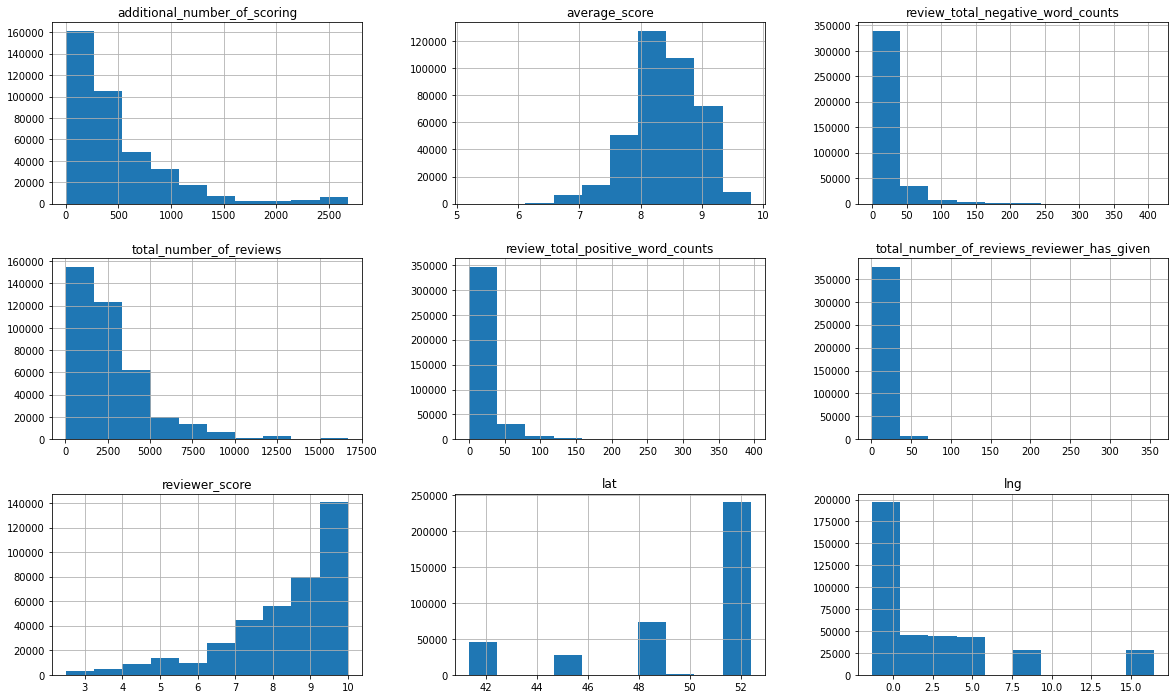

In [ ]:
# распределение числовых признаков
hotels.hist(figsize=(20, 12));

Признак 'average_score' имеет распределение близкое к нормальному, остальные логнормальное, координаты 'lat' и 'lng' показывают, что все исследуемые отели расположены в Европпе. 

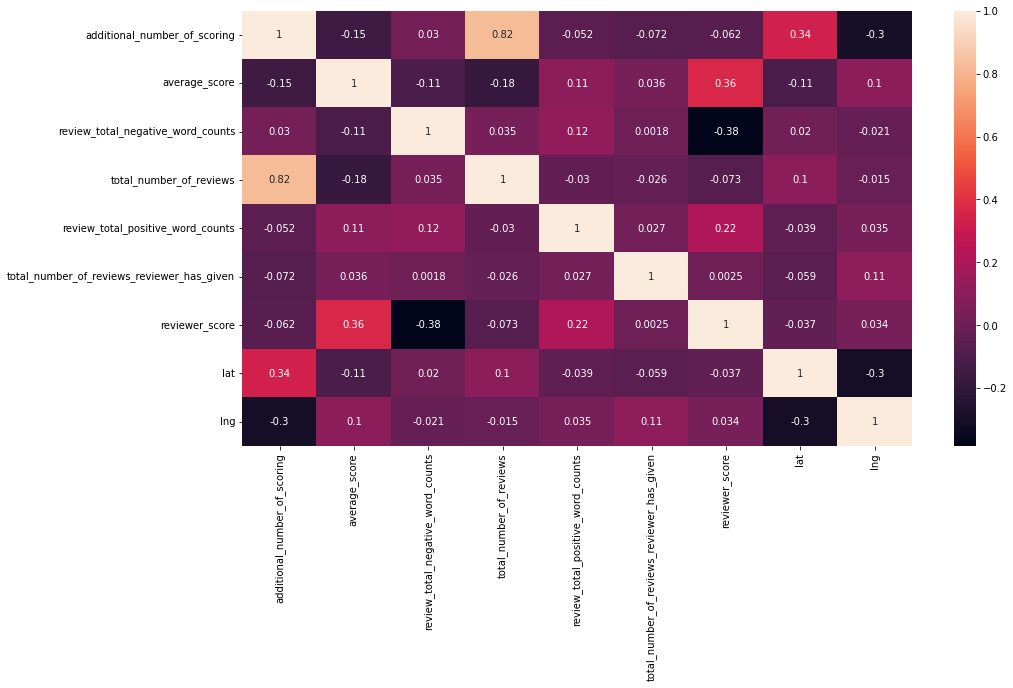

In [ ]:
# корреляция числовых признаков
fig = plt.figure(figsize=(15, 8))
sns.heatmap(hotels.corr(), annot = True)

Признаки 'additional_number_of_scoring' и 'total_number_of_reviews' обладают мультиколлениарностью, один из них следует удалить.




In [ ]:
# Удаление признака 'additional_number_of_scoring'
hotels.drop(['additional_number_of_scoring'], axis=1, inplace = True)

# Генерация признаков

In [ ]:
# Создание признака 'month' из 'review_date'

hotels['review_date'] = pd.to_datetime(hotels['review_date'])
# display(hotels['review_date'].min())
# display(hotels['review_date'].max())
hotels['month'] = hotels['review_date'].dt.month.astype(int)

# Удаление признака 'review_date'
hotels.drop(['review_date'], axis=1, inplace = True)

display(hotels['month'].value_counts())

# Однократное кодирование признака 'month'
# hotels = pd.get_dummies(hotels, columns=['month'])

8     37871
7     37114
5     34664
10    32932
6     32207
4     32202
9     31739
1     31494
3     30881
12    29697
2     28717
11    26978
Name: month, dtype: int64

In [ ]:
# преобразование признака days_since_review в числовой 

def make_numb(d_s_r):
    d_s_r = d_s_r.split()[0]
    return d_s_r

hotels['days_since_review'] = hotels['days_since_review'].apply(make_numb).astype(int)
display(hotels['days_since_review'].head())

0    531
1    203
2    289
3    681
4    516
Name: days_since_review, dtype: int64

## hotel_address

In [ ]:
# cоздаём признак страны из адреса

def h_c_fn(h_c):
    h_c = h_c.split(' ')[-1]
    if h_c == 'Kingdom': 
        h_c = 'United Kingdom'
    return h_c

hotels['hotel_country'] = hotels['hotel_address'].apply(h_c_fn)
display(hotels['hotel_country'].value_counts())

United Kingdom    196773
Spain              45132
France             44528
Netherlands        43004
Austria            29177
Italy              27882
Name: hotel_country, dtype: int64

In [ ]:
# cоздаём признак города из адреса 

def h_city_fn(h_c):
    h_c = h_c.split(' ')[-2]
    if h_c == 'United': 
        h_c = 'London'
    return h_c

hotels['hotel_city'] = hotels['hotel_address'].apply(h_city_fn)
display(hotels['hotel_city'].value_counts())

London       196773
Barcelona     45132
Paris         44528
Amsterdam     43004
Vienna        29177
Milan         27882
Name: hotel_city, dtype: int64

In [ ]:
# cоздаём признак население страны
country_population = {
    'United Kingdom':68481129,'Netherlands':17198147,'France':65515838,
    'Spain':46785044,'Italy':60313823,'Austria':9093258
}
hotels['country_population'] = hotels['hotel_country'].map(country_population)

# cоздаём признак население города
сity_population = {
    'Paris': 2139907, 'London': 9002488, 'Milan': 1374582,
    'Vienna': 1951354, 'Barcelona': 1636732, 'Amsterdam': 905234
}

hotels['сity_population'] = hotels['hotel_city'].map(сity_population)

# cоздаём признак доля населения города к населению страны
hotels['%_city_pop_from_country_pop'] = hotels['сity_population'] / hotels['country_population']

In [ ]:
# Однократное кодирование признака 'hotel_country'
hotels = pd.get_dummies(hotels, columns=['hotel_country'])

# Однократное кодирование признака 'hotel_city'
hotels = pd.get_dummies(hotels, columns=['hotel_city'])

In [ ]:
# удаление признака 'hotel_address'

hotels = hotels.drop(['hotel_address'], axis=1)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386496 non-null  float64
 1   hotel_name                                  386496 non-null  object 
 2   reviewer_nationality                        386496 non-null  object 
 3   negative_review                             386496 non-null  object 
 4   review_total_negative_word_counts           386496 non-null  int64  
 5   total_number_of_reviews                     386496 non-null  int64  
 6   positive_review                             386496 non-null  object 
 7   review_total_positive_word_counts           386496 non-null  int64  
 8   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 9   reviewer_score                              386496 non-null  float64
 

## reviewer_nationality

In [ ]:
# посмотрим, сколько всего уникальных национальностей
print(len(hotels['reviewer_nationality'].unique()))

# выделим 10 наиболее активных национальностей
top_ten_nationalities= hotels['reviewer_nationality'].value_counts().nlargest(10).index
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(lambda x: x if x in top_ten_nationalities else 'Other')

display(hotels['reviewer_nationality'].head(5))

# кодируем признак национальности с помощью LabelEncoder
hotels['reviewer_nationality'] = LabelEncoder().fit_transform(hotels['reviewer_nationality'])

display(hotels['reviewer_nationality'].head(5))

225


0     United Kingdom 
1     United Kingdom 
2               Other
3     United Kingdom 
4               Other
Name: reviewer_nationality, dtype: object

0     8
1     8
2    10
3     8
4    10
Name: reviewer_nationality, dtype: int64

## Создание признаков с долями позитивных и негативных слов в отзывавах

In [ ]:
# добавим доли позитивных и негативных слов в общем количестве слов в отзыве

hotels['%_positive_words_in_review'] = hotels['review_total_positive_word_counts'] \
 / (hotels['review_total_positive_word_counts'] + hotels['review_total_negative_word_counts'])
hotels['%_negative_words_in_review'] = hotels['review_total_negative_word_counts'] \
 / (hotels['review_total_positive_word_counts'] + hotels['review_total_negative_word_counts'])

# добавим доли позитивных и негативных слов в расчете на один отзыв
hotels['%_positive_words_per_review'] = hotels['review_total_positive_word_counts'] \
 / hotels['total_number_of_reviews_reviewer_has_given']
hotels['%_negative_words_per_review'] = hotels['review_total_negative_word_counts'] \
 / hotels['total_number_of_reviews_reviewer_has_given']

hotels.head(3)

,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,...,hotel_city_Amsterdam,hotel_city_Barcelona,hotel_city_London,hotel_city_Milan,hotel_city_Paris,hotel_city_Vienna,%_positive_words_in_review,%_negative_words_in_review,%_positive_words_per_review,%_negative_words_per_review
0,8.4,The May Fair Hotel,8,Leaving,3,1994,Staff were amazing,4,7,10.0,...,0,0,1,0,0,0,0.571429,0.428571,0.571429,0.428571
1,8.3,Mercure London Bloomsbury Hotel,8,poor breakfast,3,1361,location,2,14,6.3,...,0,0,1,0,0,0,0.400000,0.600000,0.142857,0.214286
2,8.9,Legend Saint Germain by Elegancia,10,No kettle in room,6,406,No Positive,0,14,7.5,...,0,0,0,0,1,0,0.000000,1.000000,0.000000,0.428571


In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386496 non-null  float64
 1   hotel_name                                  386496 non-null  object 
 2   reviewer_nationality                        386496 non-null  int64  
 3   negative_review                             386496 non-null  object 
 4   review_total_negative_word_counts           386496 non-null  int64  
 5   total_number_of_reviews                     386496 non-null  int64  
 6   positive_review                             386496 non-null  object 
 7   review_total_positive_word_counts           386496 non-null  int64  
 8   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 9   reviewer_score                              386496 non-null  float64
 

In [ ]:
# удаление пропусков в признаках '%_positive_words_in_review' и '%_negative_words_in_review'

hotels['%_positive_words_in_review'] = hotels['%_positive_words_in_review'] \
                         .fillna(hotels['%_positive_words_in_review'].median())

hotels['%_negative_words_in_review'] = hotels['%_negative_words_in_review'] \
                         .fillna(hotels['%_negative_words_in_review'].median())

hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386496 non-null  float64
 1   hotel_name                                  386496 non-null  object 
 2   reviewer_nationality                        386496 non-null  int64  
 3   negative_review                             386496 non-null  object 
 4   review_total_negative_word_counts           386496 non-null  int64  
 5   total_number_of_reviews                     386496 non-null  int64  
 6   positive_review                             386496 non-null  object 
 7   review_total_positive_word_counts           386496 non-null  int64  
 8   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 9   reviewer_score                              386496 non-null  float64
 

## tags

In [ ]:
# переделываем признак tags в списки

def make_list(tags):
    tags = tags[3:-3].split(" ', ' ")
    return tags

hotels['tags'] = hotels['tags'].apply(make_list)
display(hotels['tags'].head(10))

0    [Leisure trip, Couple, Studio Suite, Stayed 2 ...
1    [Business trip, Couple, Standard Double Room, ...
2    [Leisure trip, Solo traveler, Modern Double Ro...
3    [Leisure trip, Solo traveler, Standard Room wi...
4    [Business trip, Couple, Standard Double or Twi...
5    [Business trip, Solo traveler, Superior Twin R...
6    [Leisure trip, Couple, Double Room Non Smoking...
7    [Leisure trip, Couple, Superior Double Room, S...
8    [Leisure trip, Couple, Double Room, Stayed 1 n...
9    [Leisure trip, Couple, Twin Hilton Guest Room,...
Name: tags, dtype: object

In [ ]:
# Создание общего списка из тэгов

tags_list = list()
i = 0
while i < len(hotels['tags']):
    tags_list.extend(hotels['tags'].iloc[i])
    i += 1

print(len(tags_list))

1766136


In [ ]:
# Создание Series из словаря и его сортировка

count_dict = {} 
for tag in tags_list: 
    #проверяем условие, что тэга ещё нет среди ключей словаря
    if tag not in count_dict: #если условие выполняется,
        count_dict[tag] = 1 #заносим тэг в словарь со значением 1
    else: 
        count_dict[tag] += 1 
       
tag_series = pd.Series(count_dict, name = 'tags')
display(tag_series.sort_values().nlargest(15))

Leisure trip                      313353
Submitted from a mobile device    230608
Couple                            189046
Stayed 1 night                    145296
Stayed 2 nights                   100176
Solo traveler                      81166
Stayed 3 nights                    71940
Business trip                      61934
Group                              49057
Family with young children         45810
Stayed 4 nights                    35708
Double Room                        26386
Standard Double Room               24150
Superior Double Room               23518
Family with older children         19787
Name: tags, dtype: int64

In [ ]:
# Создание 15 признаков из признака 'tags' по самым популярным тэгам

popular_tags = list(tag_series.sort_values().nlargest(15).index)

for tag in popular_tags:
    hotels[tag] = hotels['tags'].apply(lambda x: 1 if tag in x else 0)

display(hotels.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 49 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386496 non-null  float64
 1   hotel_name                                  386496 non-null  object 
 2   reviewer_nationality                        386496 non-null  int64  
 3   negative_review                             386496 non-null  object 
 4   review_total_negative_word_counts           386496 non-null  int64  
 5   total_number_of_reviews                     386496 non-null  int64  
 6   positive_review                             386496 non-null  object 
 7   review_total_positive_word_counts           386496 non-null  int64  
 8   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 9   reviewer_score                              386496 non-null  float64
 

None

## Cоздание признаков по эмоциональности отзывов. Библиотека TextBlob

In [ ]:
# Создание признаков 'negative_review_pol' и 'positive_review_pol' - оценка степени негатива и позитива

hotels['negative_review_pol'] = hotels['negative_review'].apply(lambda x: TextBlob(x).polarity)
hotels['positive_review_pol'] = hotels['positive_review'].apply(lambda x: TextBlob(x).polarity)

# display(hotels['negative_review_pol'])
# display(hotels['positive_review_pol'])

In [ ]:
# Создание признаков 'negative_review_sub' и 'positive_review_sub' - оценка субъективности отзыва

hotels['negative_review_sub'] = hotels['negative_review'].apply(lambda x: TextBlob(x).subjectivity)
hotels['positive_review_sub'] = hotels['positive_review'].apply(lambda x: TextBlob(x).subjectivity)

# Отбор признаков

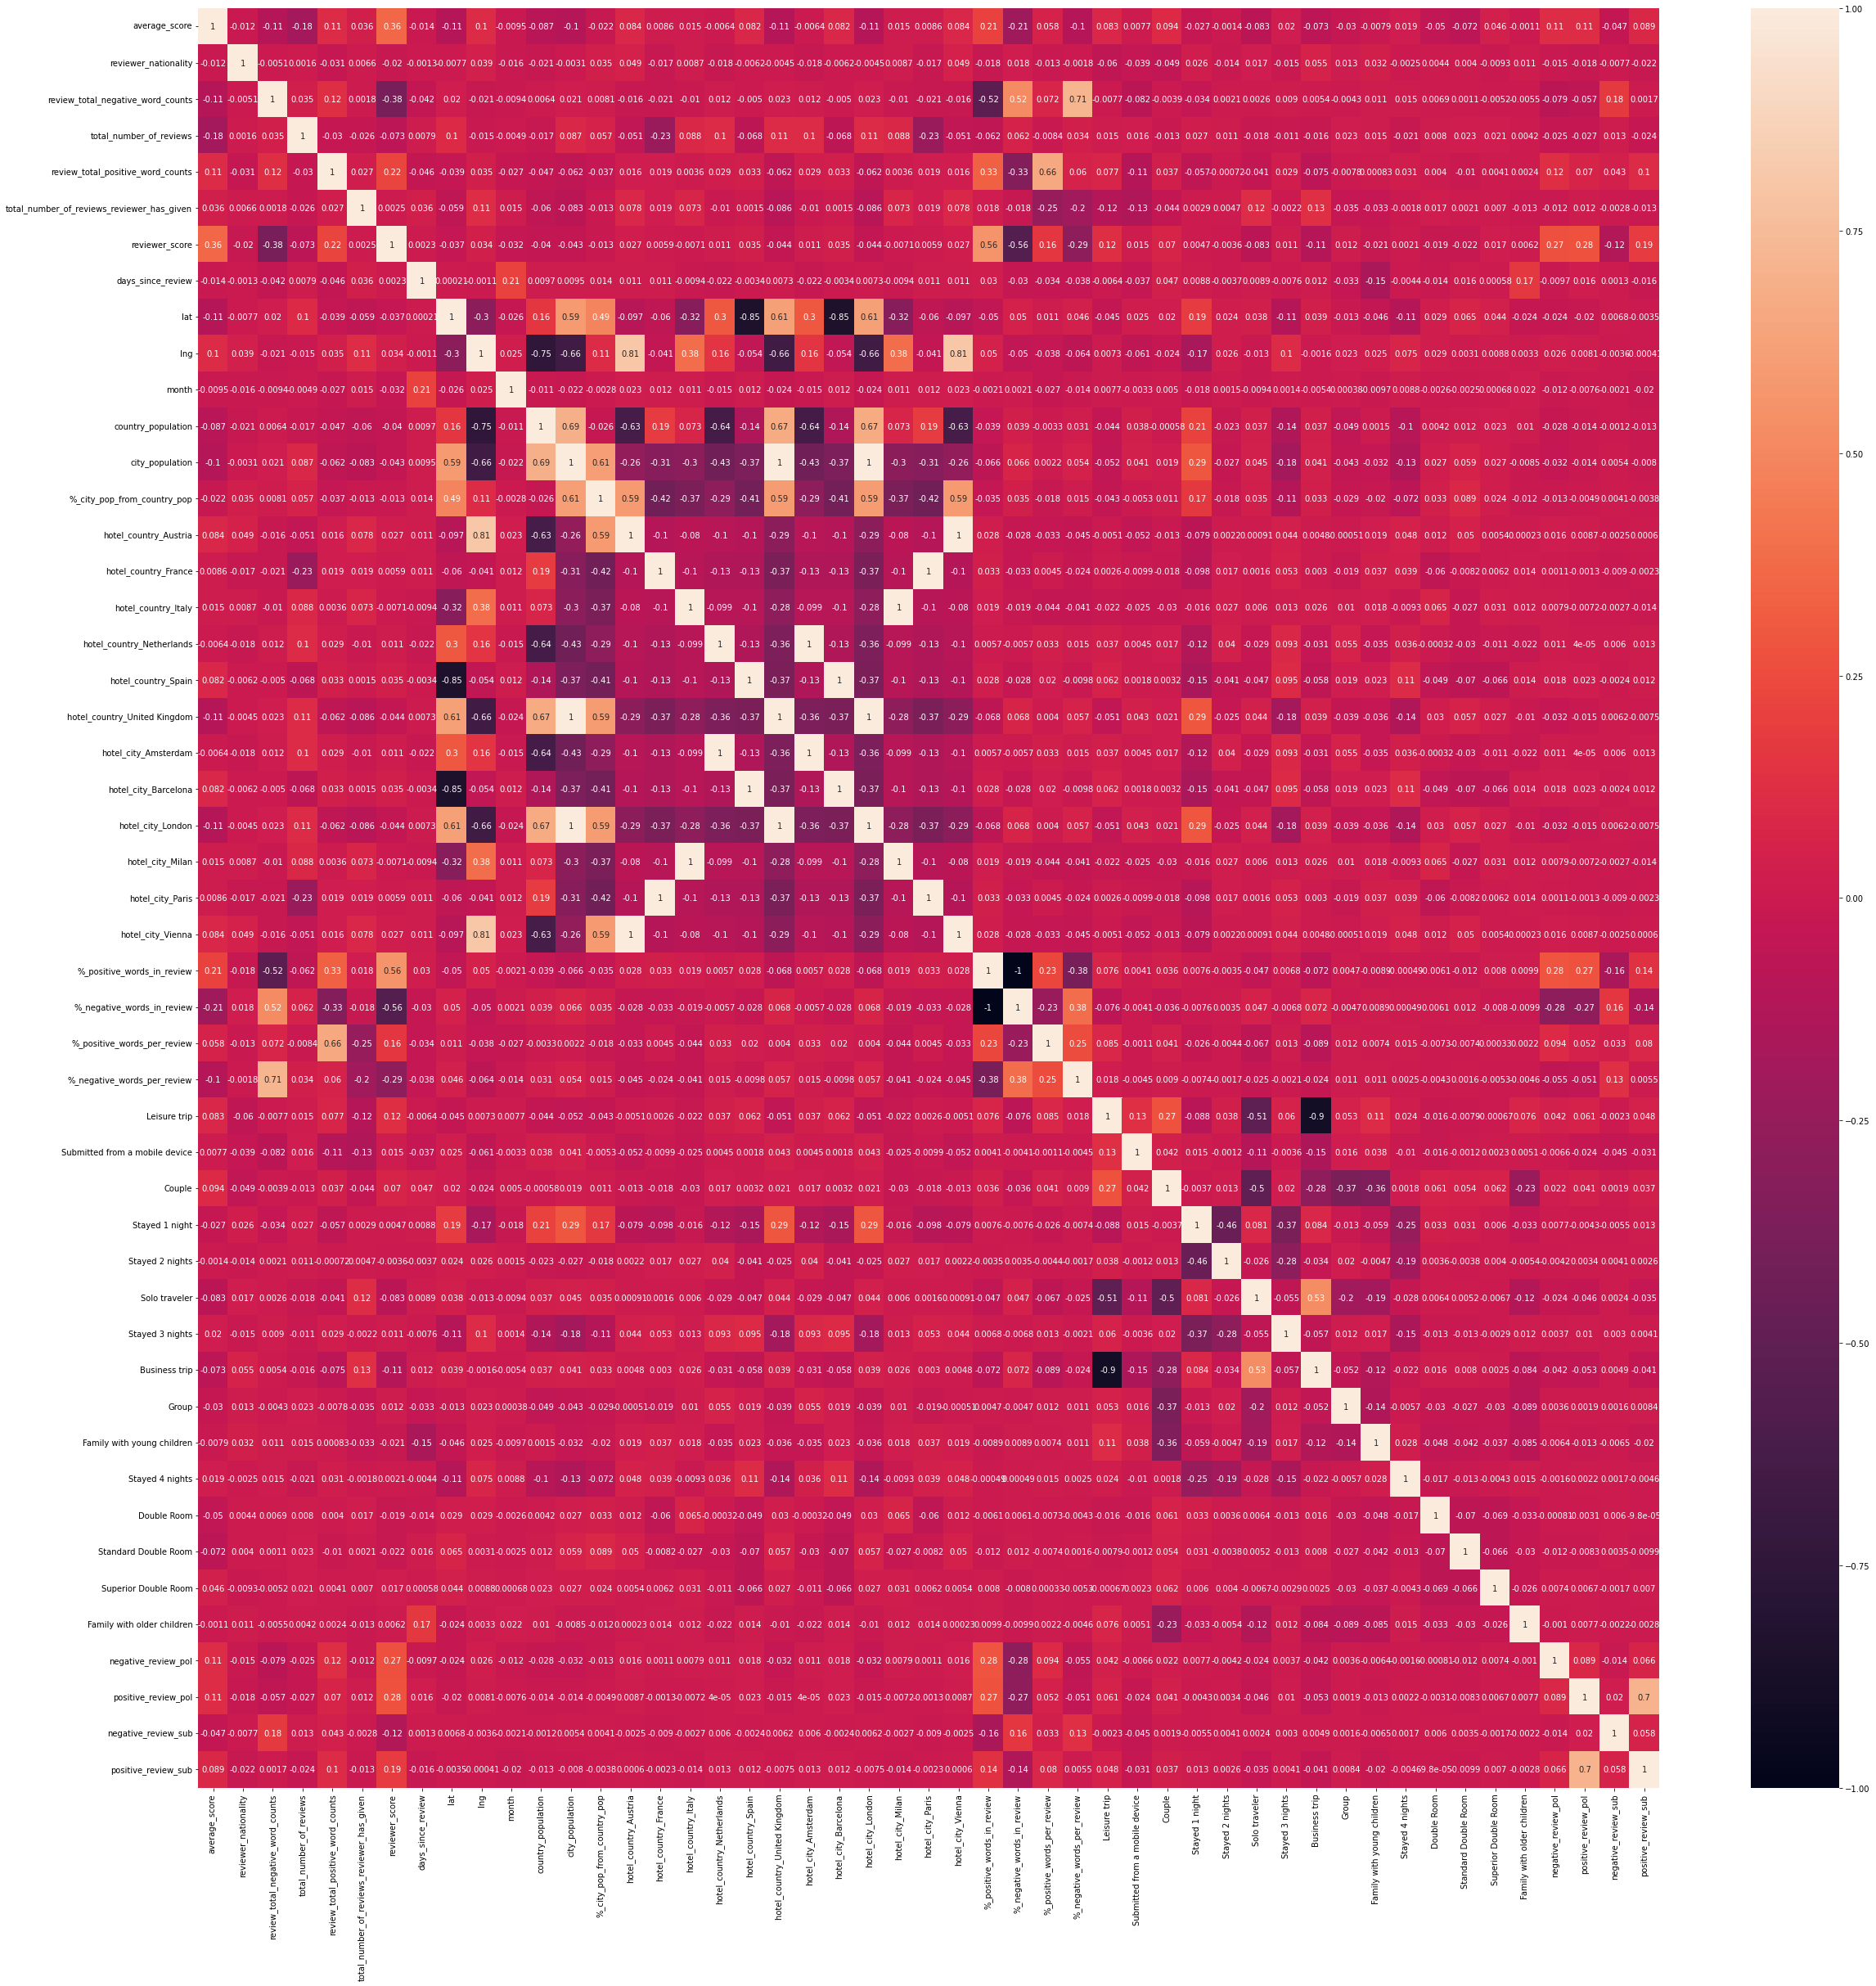

In [ ]:
# проверка корреляции полученных числовых признаков
fig = plt.figure(figsize=(40, 40))
sns.heatmap(hotels.corr(), annot = True)

In [ ]:
# Удаление признаков  
hotels = hotels.drop(['Business trip', 'hotel_country_Austria', 'hotel_country_France', \
             'hotel_country_Italy', 'hotel_country_Netherlands', 'hotel_country_Spain', \
             'hotel_country_United Kingdom', '%_negative_words_in_review', 'lat', \
             'lng', '%_negative_words_per_review', 'country_population', 'сity_population'], axis=1) #, inplace = True)

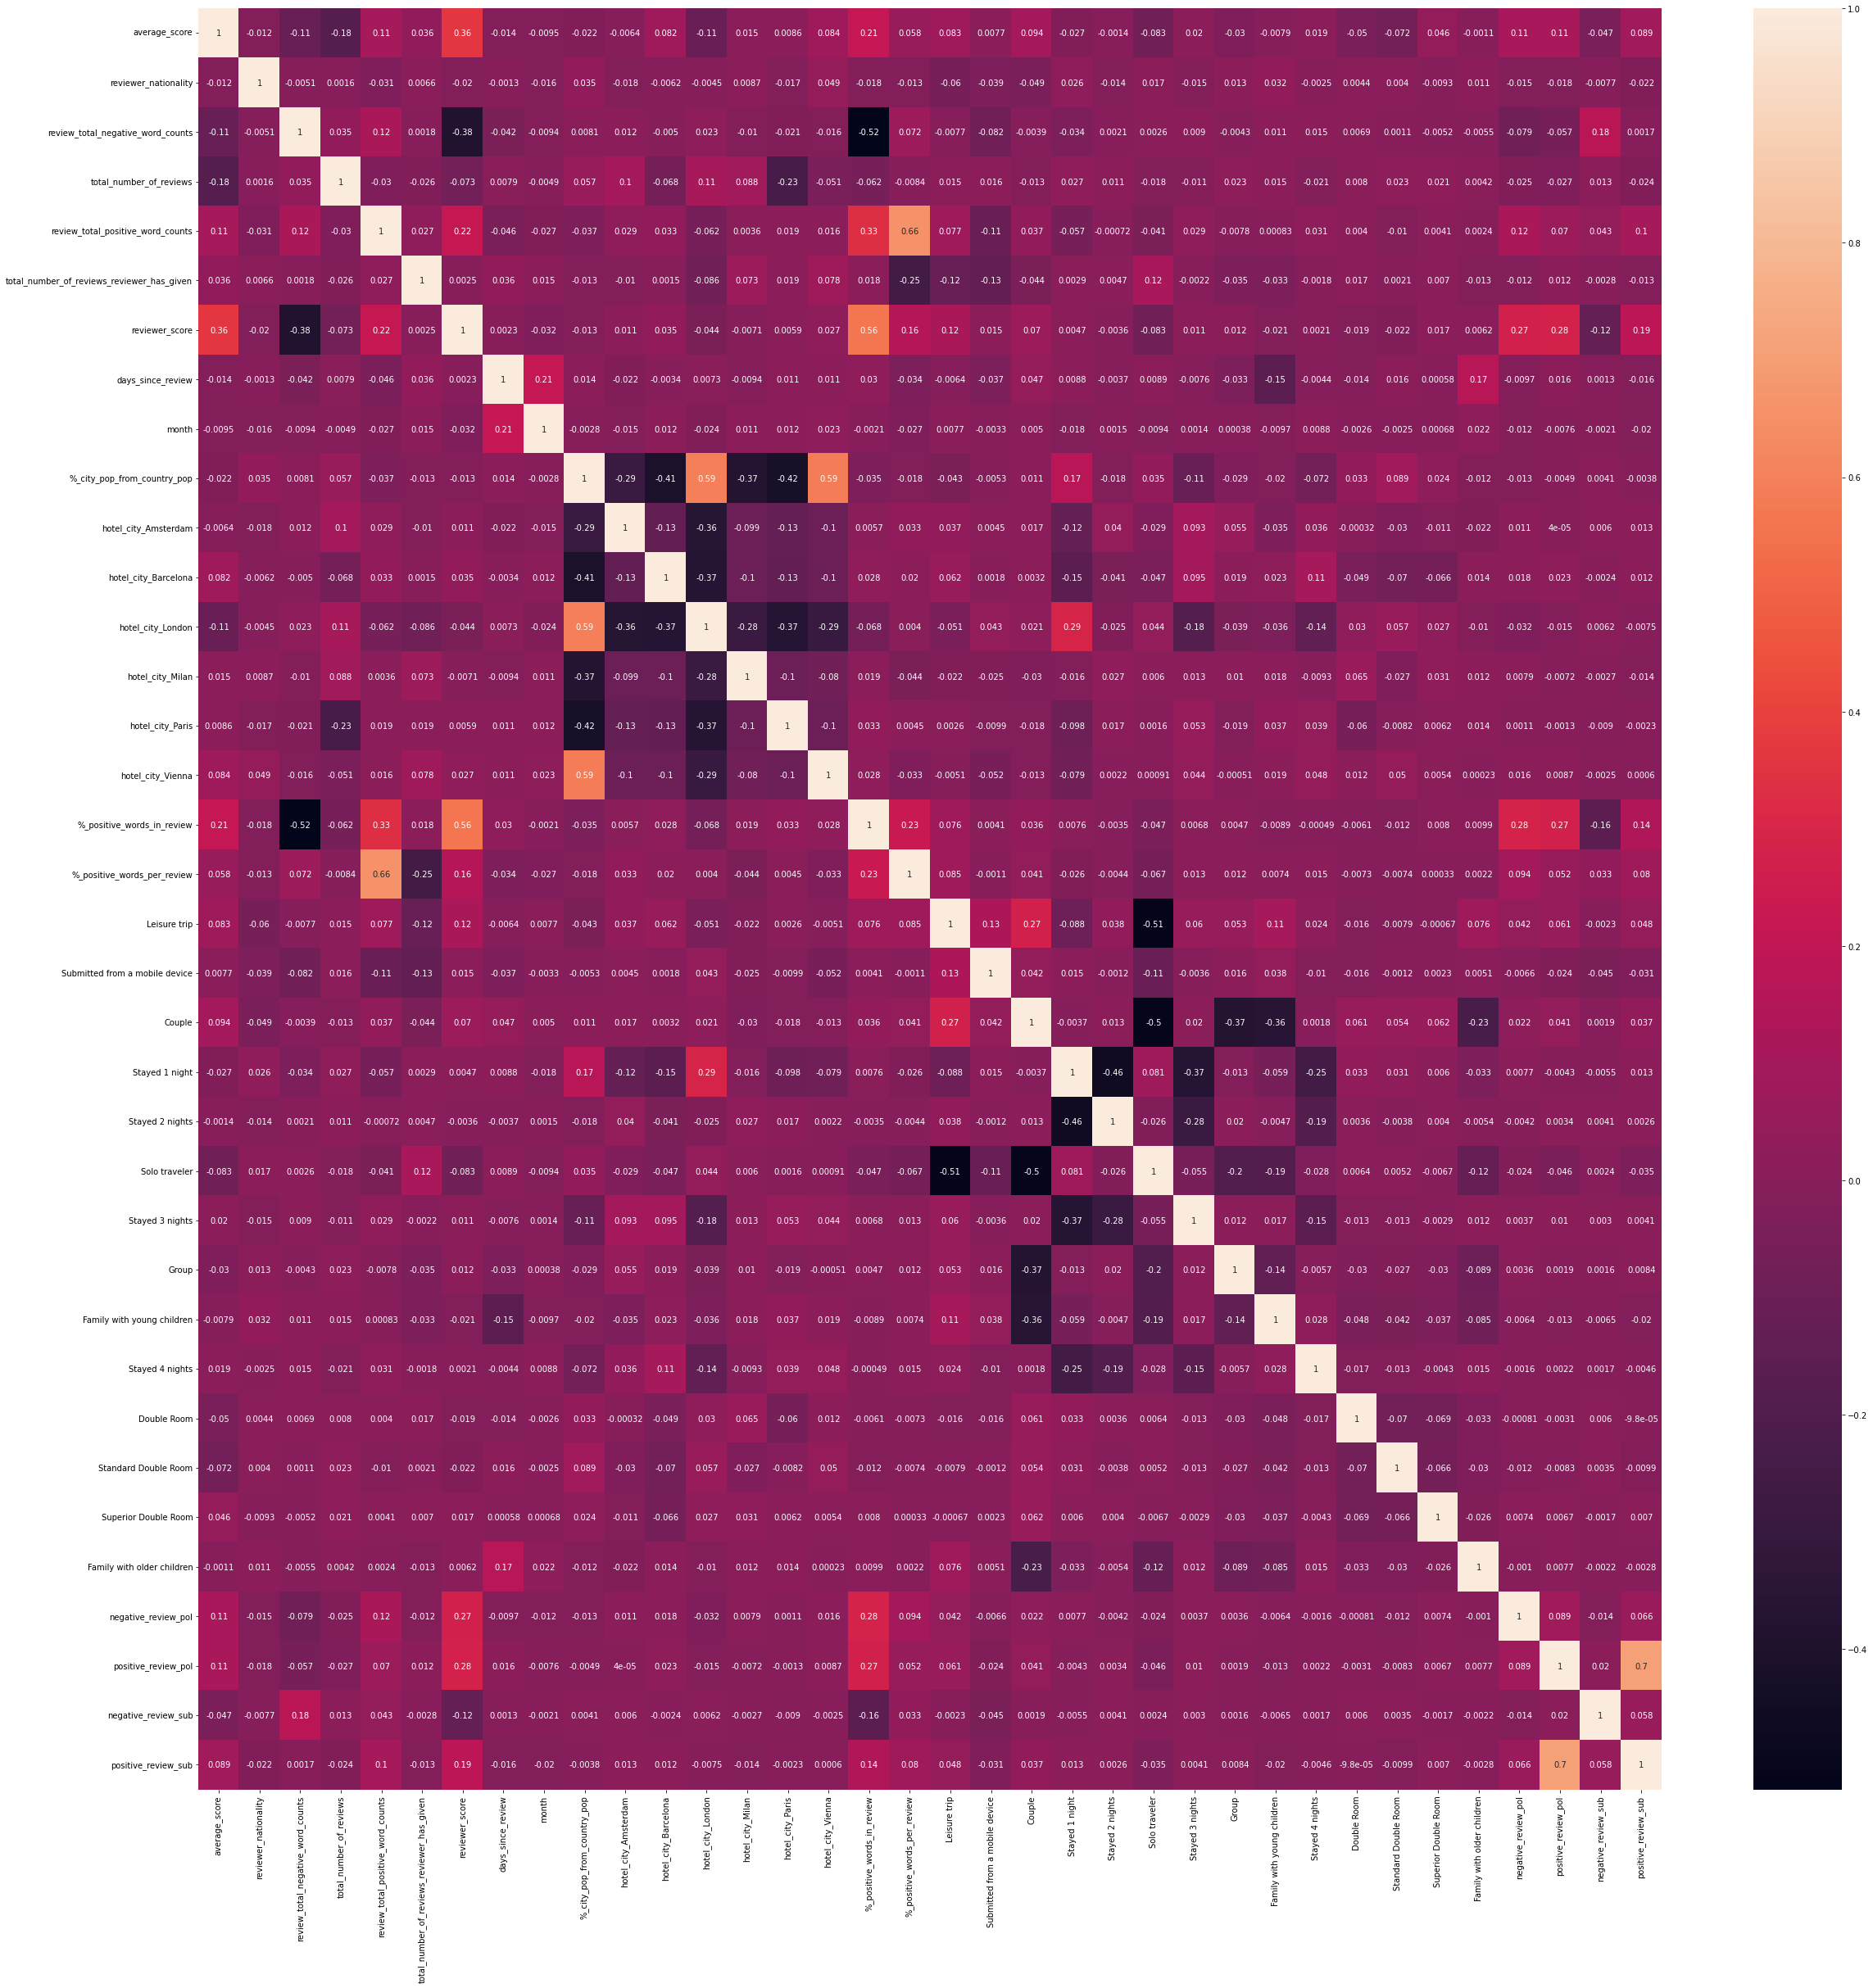

In [ ]:
# проверка корреляции оставшихся числовых признаков
fig = plt.figure(figsize=(40, 40))
sns.heatmap(hotels.corr(), annot = True)

In [ ]:
# Удаление нечисловых признаков
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386496 non-null  float64
 1   reviewer_nationality                        386496 non-null  int64  
 2   review_total_negative_word_counts           386496 non-null  int64  
 3   total_number_of_reviews                     386496 non-null  int64  
 4   review_total_positive_word_counts           386496 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 6   reviewer_score                              386496 non-null  float64
 7   days_since_review                           386496 non-null  int64  
 8   month                                       386496 non-null  int64  
 9   %_city_pop_from_country_pop                 386496 non-null  float64
 

# Оценка значимости признаков

In [ ]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', \
            'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', \
            'days_since_review', '%_city_pop_from_country_pop', '%_positive_words_in_review',  \
            '%_positive_words_per_review', 'negative_review_pol', 'positive_review_pol', \
            'negative_review_sub', 'positive_review_sub']

# категориальные признаки
cat_cols = ['average_score', 'month', 'Leisure trip', 'Submitted from a mobile device', \
            'Stayed 1 night', 'Couple', 'Stayed 2 nights', 'Stayed 3 nights', 'Group', \
            'Family with young children', 'Stayed 4 nights', 'Double Room', 'Standard Double Room', \
            'Superior Double Room', 'Family with older children', 'hotel_city_Amsterdam', \
            'hotel_city_Barcelona', 'hotel_city_London', 'hotel_city_Milan', 'hotel_city_Paris', \
            'hotel_city_Vienna']

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

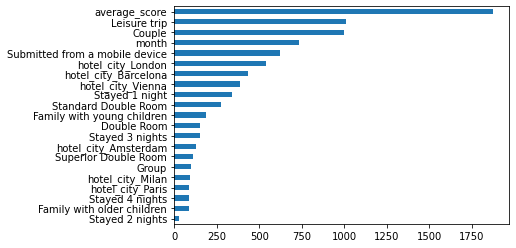

In [ ]:
# оценка значимости категориальных признаков

yy=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], yy)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

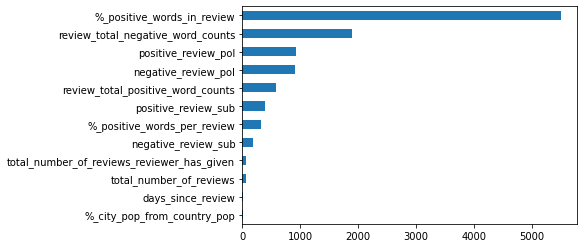

In [ ]:
# оценка значимости числовых признаков

from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

# Создание и обучение модели

In [ ]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [ ]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)#, verbose=1, n_jobs=-1, random_state=42)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12802759501401514


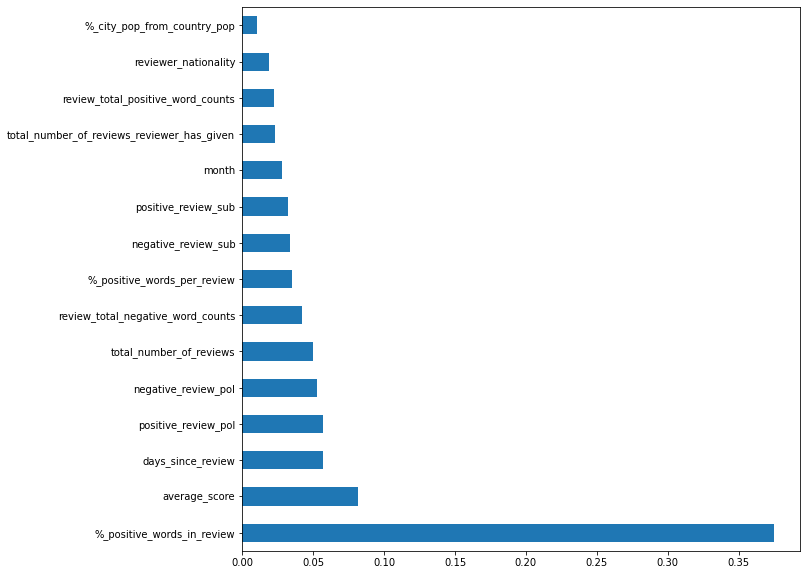

In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели

plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Небольшой бонус:


In [ ]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

In [ ]:
#from textblob import TextBlob

#sentence = '''The platform provides universal access to the world's best education, partnering with top universities and organizations to offer courses online.'''

#analysisPol = TextBlob(sentence).polarity
#analysisSub = TextBlob(sentence).subjectivity

#print(analysisPol)
#print(analysisSub)